In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [13]:
fp = Path("/usr/scratch/rsarkar30/inr_dsp_builds/stream_io.csv")
df = pd.read_csv(fp, header=0)
groups = df.groupby("stream")
# sort groups by latest timestamp
groups = sorted(groups, key=lambda x: x[1]["time"].max())

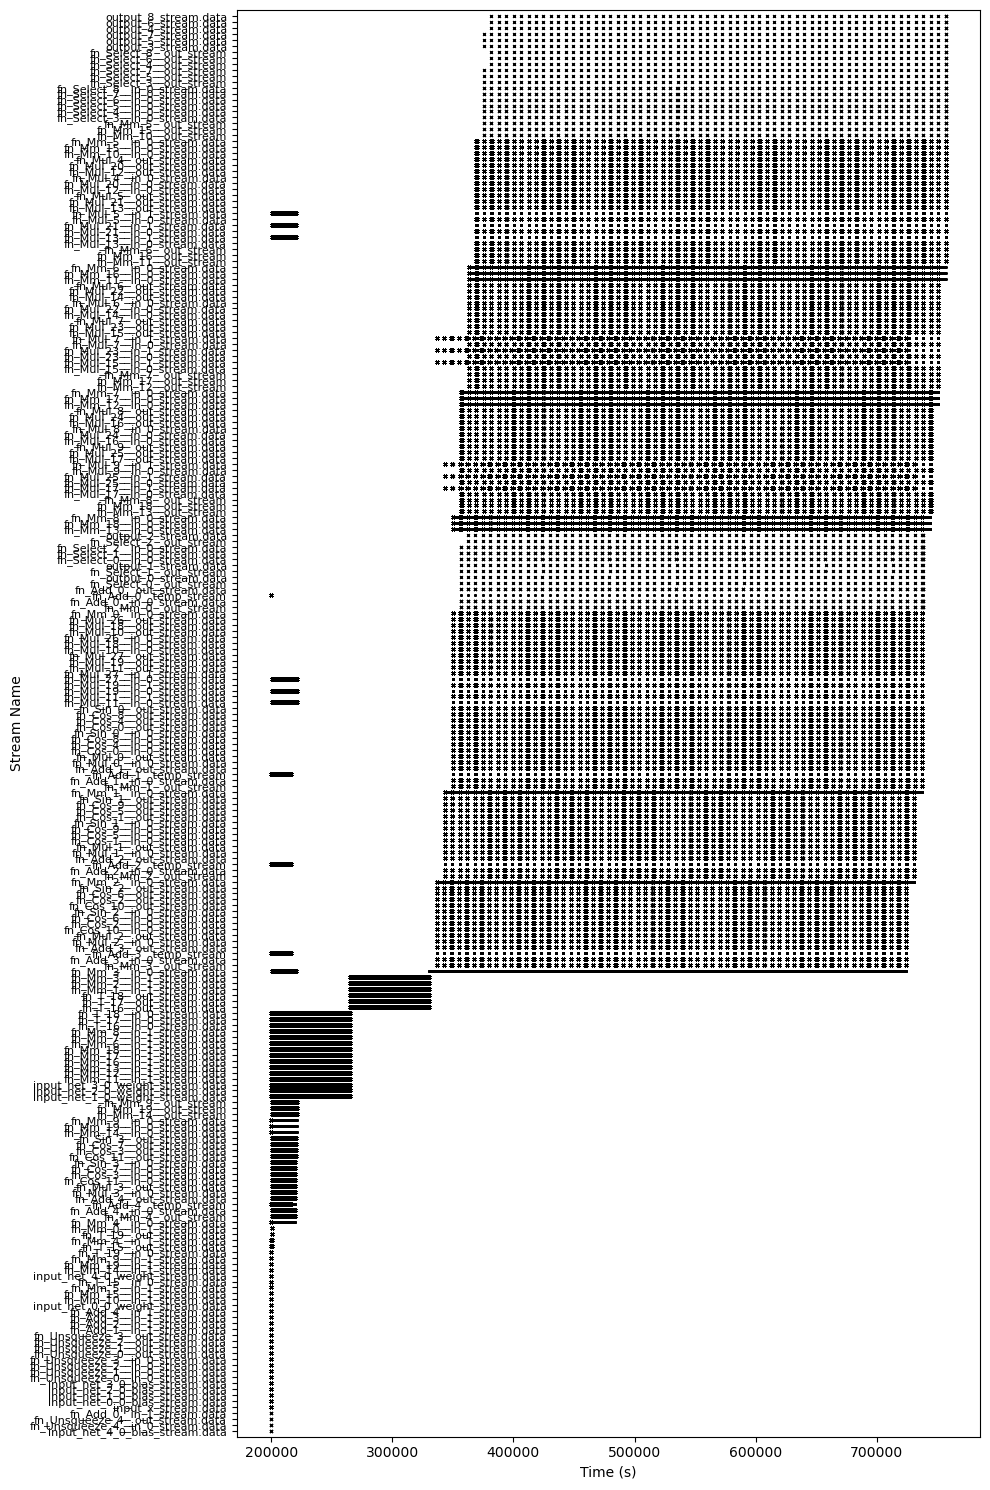

In [36]:
# the df is a table woith columns:
# time	stream	is_write

# make a plot where the x axis is time, and the y axis is the stream name
# then for each time that a stream is written to, plot a x at that time

fig, ax = plt.subplots(figsize=(10, 20))
# ax.set_title("Stream I/O")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Stream Name")

for name, group in groups:
    writes = group[group["is_write"] == True]
    reads = group[group["is_write"] == False]
    ax.plot(writes["time"], writes["stream"], marker="x", linestyle="", markersize=2, color="black")
    ax.plot(reads["time"], reads["stream"], marker="o", linestyle="", markersize=1, color="black")

ax.set_yticks(range(len(groups)))
ax.set_yticklabels([name for name, _ in groups])
# font size should bn smaller for the y axis
ax.tick_params(axis="y", labelsize=8)
# ax.set_yticklabels([])
ax.set_ylim(-1, len(groups))
plt.tight_layout()
plt.show()